In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.duplicated().any()

False

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#Dummy creation

In [6]:
# Convert CarName to category dtype
df['CarName'] = df['CarName'].astype('category')

# Create a mapping dictionary from category codes to category names
cat_mapping_carname = dict(enumerate (df['CarName'].cat.categories))

# Convert CarName to numeric codes
df['CarName'] = df['CarName'].cat.codes

print(cat_mapping_carname)

{0: 'Nissan versa', 1: 'alfa-romero Quadrifoglio', 2: 'alfa-romero giulia', 3: 'alfa-romero stelvio', 4: 'audi 100 ls', 5: 'audi 100ls', 6: 'audi 4000', 7: 'audi 5000', 8: 'audi 5000s (diesel)', 9: 'audi fox', 10: 'bmw 320i', 11: 'bmw x1', 12: 'bmw x3', 13: 'bmw x4', 14: 'bmw x5', 15: 'bmw z4', 16: 'buick century', 17: 'buick century luxus (sw)', 18: 'buick century special', 19: 'buick electra 225 custom', 20: 'buick opel isuzu deluxe', 21: 'buick regal sport coupe (turbo)', 22: 'buick skyhawk', 23: 'buick skylark', 24: 'chevrolet impala', 25: 'chevrolet monte carlo', 26: 'chevrolet vega 2300', 27: 'dodge challenger se', 28: 'dodge colt (sw)', 29: 'dodge colt hardtop', 30: 'dodge coronet custom', 31: 'dodge coronet custom (sw)', 32: 'dodge d200', 33: 'dodge dart custom', 34: 'dodge monaco (sw)', 35: 'dodge rampage', 36: 'honda accord', 37: 'honda accord cvcc', 38: 'honda accord lx', 39: 'honda civic', 40: 'honda civic (auto)', 41: 'honda civic 1300', 42: 'honda civic 1500 gl', 43: 'hon

In [7]:
cat_mapping_carname[1]

'alfa-romero Quadrifoglio'

In [8]:
# Convert CarName to category dtype
df['fueltype'] = df['fueltype'].astype('category')

# Create a mapping dictionary from category codes to category names
cat_mapping_fueltype = dict(enumerate (df['fueltype'].cat.categories))

# Convert CarName to numeric codes
df['fueltype'] = df['fueltype'].cat.codes

print(cat_mapping_fueltype)

{0: 'diesel', 1: 'gas'}


In [9]:
df['aspiration'] = df['aspiration'].astype('category')

cat_mapping_aspiration = dict(enumerate (df['aspiration'].cat.categories))

df['aspiration'] = df['aspiration'].cat.codes

print(cat_mapping_aspiration)

{0: 'std', 1: 'turbo'}


In [10]:
df['doornumber'] = df['doornumber'].astype('category')

cat_mapping_doornumber = dict(enumerate (df['doornumber'].cat.categories))

df['doornumber'] = df['doornumber'].cat.codes

print(cat_mapping_doornumber)

{0: 'four', 1: 'two'}


In [11]:
df['carbody'] = df['carbody'].astype('category')

cat_mapping_carbody = dict(enumerate (df['carbody'].cat.categories))

df['carbody'] = df['carbody'].cat.codes

print(cat_mapping_carbody)

{0: 'convertible', 1: 'hardtop', 2: 'hatchback', 3: 'sedan', 4: 'wagon'}


In [12]:
df['drivewheel'] = df['drivewheel'].astype('category')

cat_mapping_drivewheel = dict(enumerate (df['drivewheel'].cat.categories))

df['drivewheel'] = df['drivewheel'].cat.codes

print(cat_mapping_drivewheel)

{0: '4wd', 1: 'fwd', 2: 'rwd'}


In [13]:
df['enginelocation'] = df['enginelocation'].astype('category')

cat_mapping_enginelocation = dict(enumerate (df['enginelocation'].cat.categories))

df['enginelocation'] = df['enginelocation'].cat.codes

print(cat_mapping_enginelocation)

{0: 'front', 1: 'rear'}


In [14]:
df['enginetype'] = df['enginetype'].astype('category')

cat_mapping_enginetype = dict(enumerate (df['enginetype'].cat.categories))

df['enginetype'] = df['enginetype'].cat.codes

print(cat_mapping_enginetype)

{0: 'dohc', 1: 'dohcv', 2: 'l', 3: 'ohc', 4: 'ohcf', 5: 'ohcv', 6: 'rotor'}


In [15]:
df['cylindernumber'] = df['cylindernumber'].astype('category')

cat_mapping_cylindernumber = dict(enumerate (df['cylindernumber'].cat.categories))

df['cylindernumber'] = df['cylindernumber'].cat.codes

print(cat_mapping_cylindernumber)

{0: 'eight', 1: 'five', 2: 'four', 3: 'six', 4: 'three', 5: 'twelve', 6: 'two'}


In [16]:
df['fuelsystem'] = df['fuelsystem'].astype('category')

cat_mapping_fuelsystem = dict(enumerate (df['fuelsystem'].cat.categories))

df['fuelsystem'] = df['fuelsystem'].cat.codes

print(cat_mapping_fuelsystem)

{0: '1bbl', 1: '2bbl', 2: '4bbl', 3: 'idi', 4: 'mfi', 5: 'mpfi', 6: 'spdi', 7: 'spfi'}


#Multicollinearity

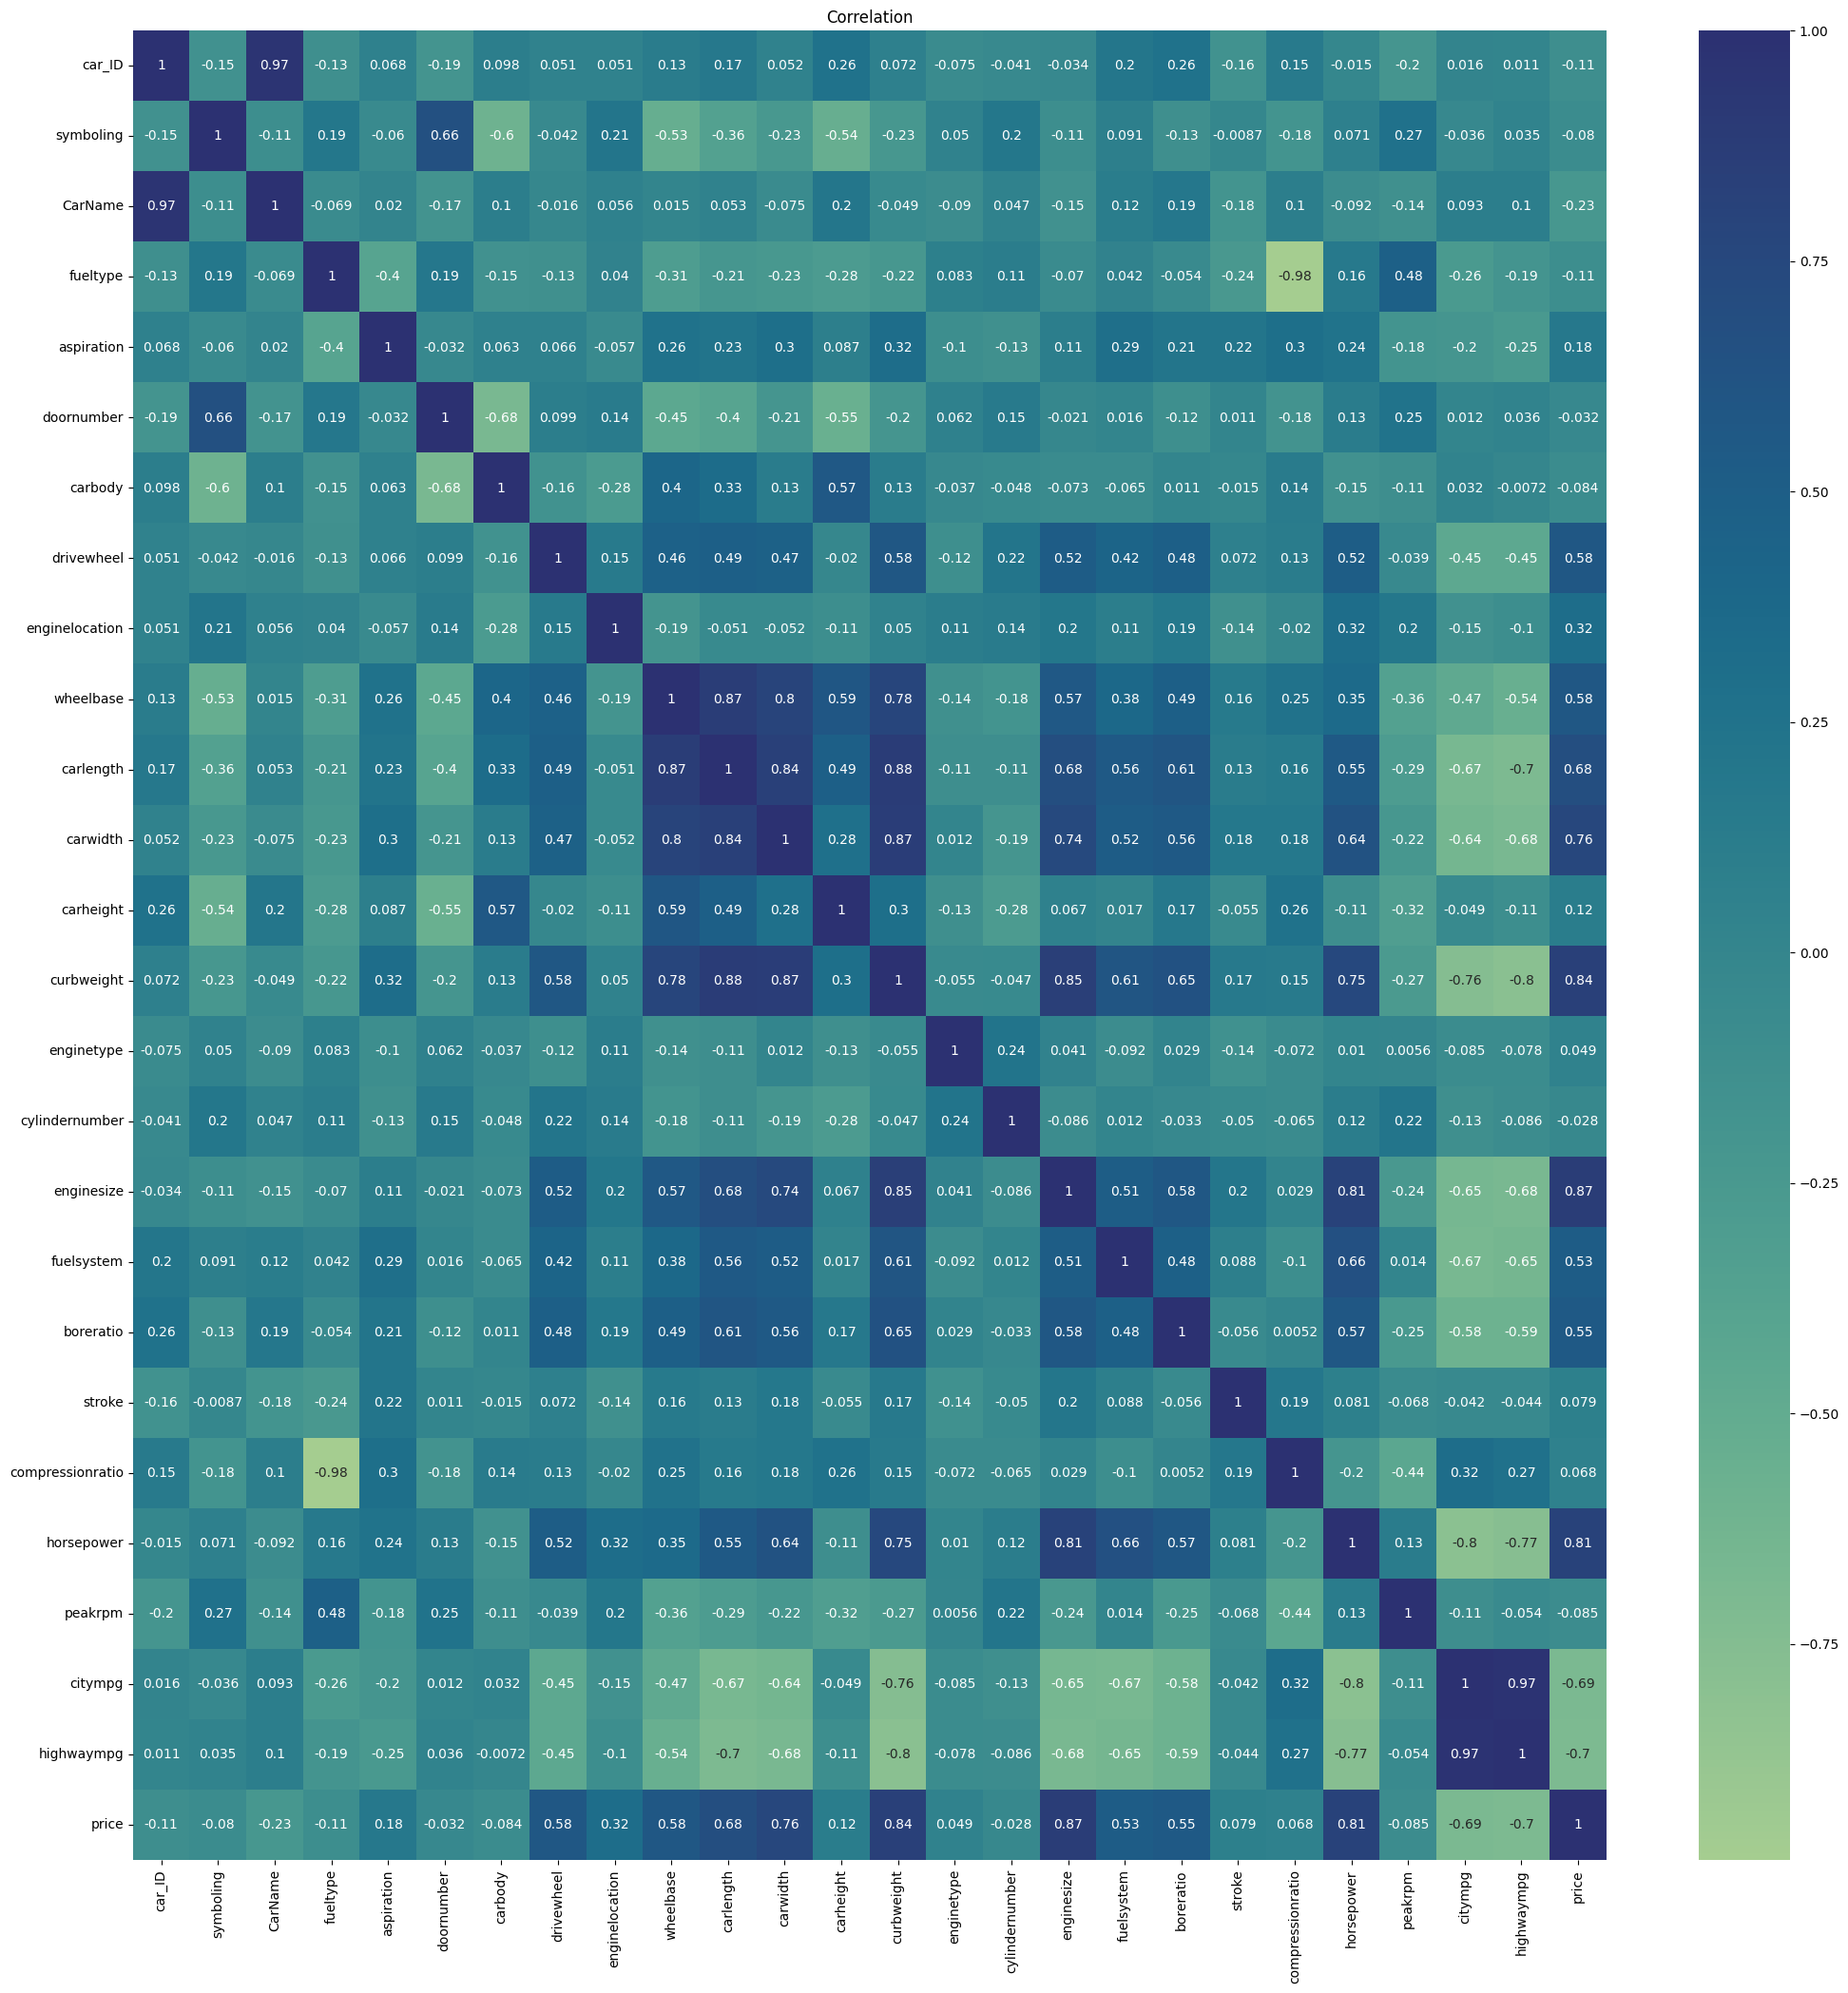

In [17]:
import seaborn as sns
#Heatmap
plt.figure(figsize = (25, 25), dpi = 100)
plt.title("Correlation")
sns.heatmap(df.corr(), annot = True, cmap = "crest")
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming X contains your predictor variables
X = df.drop(['price', 'car_ID'], axis=1)

# Assuming y contains your target variable
y = df['price']

X.reset_index(drop=True, inplace=True)

# Add a constant to the predictor matrix for the intercept
X_with_intercept= add_constant(X)


# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X_with_intercept.columns
vif["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]


# Display the VIF values
print(vif)


            Variable          VIF
0              const  8589.852736
1          symboling     2.829656
2            CarName     1.540845
3           fueltype   104.546738
4         aspiration     3.327187
5         doornumber     2.843832
6            carbody     2.798981
7         drivewheel     2.573641
8     enginelocation     1.750237
9          wheelbase    10.896914
10         carlength    11.830587
11          carwidth     8.961245
12         carheight     3.104518
13        curbweight    19.087709
14        enginetype     1.614641
15    cylindernumber     2.256182
16        enginesize    14.086951
17        fuelsystem     2.612068
18         boreratio     2.492111
19            stroke     1.585492
20  compressionratio    95.862088
21        horsepower    15.378547
22           peakrpm     2.742821
23           citympg    32.874468
24        highwaympg    28.305542


In [19]:
high_vif_variables = vif[vif['VIF'] > 5]['Variable'].tolist()

print(high_vif_variables)


['const', 'fueltype', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'compressionratio', 'horsepower', 'citympg', 'highwaympg']


In [20]:
# Get the correlation between the desired columns
correlation = X_with_intercept.corr()

correlation_filtered = correlation[abs(correlation) > 0.7 ]
# Print the correlation
print(correlation_filtered)

                  const  symboling  CarName  fueltype  aspiration  doornumber  \
const               NaN        NaN      NaN       NaN         NaN         NaN   
symboling           NaN        1.0      NaN       NaN         NaN         NaN   
CarName             NaN        NaN      1.0       NaN         NaN         NaN   
fueltype            NaN        NaN      NaN  1.000000         NaN         NaN   
aspiration          NaN        NaN      NaN       NaN         1.0         NaN   
doornumber          NaN        NaN      NaN       NaN         NaN         1.0   
carbody             NaN        NaN      NaN       NaN         NaN         NaN   
drivewheel          NaN        NaN      NaN       NaN         NaN         NaN   
enginelocation      NaN        NaN      NaN       NaN         NaN         NaN   
wheelbase           NaN        NaN      NaN       NaN         NaN         NaN   
carlength           NaN        NaN      NaN       NaN         NaN         NaN   
carwidth            NaN     

In [21]:
X_with_intercept = X_with_intercept.drop(['fueltype', 'wheelbase', 'curbweight', 'horsepower', 'citympg', 'carlength', 'carwidth'], axis=1)
X_with_intercept.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             205 non-null    float64
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int16  
 3   aspiration        205 non-null    int8   
 4   doornumber        205 non-null    int8   
 5   carbody           205 non-null    int8   
 6   drivewheel        205 non-null    int8   
 7   enginelocation    205 non-null    int8   
 8   carheight         205 non-null    float64
 9   enginetype        205 non-null    int8   
 10  cylindernumber    205 non-null    int8   
 11  enginesize        205 non-null    int64  
 12  fuelsystem        205 non-null    int8   
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  peakrpm           205 non-null    int64  
 1

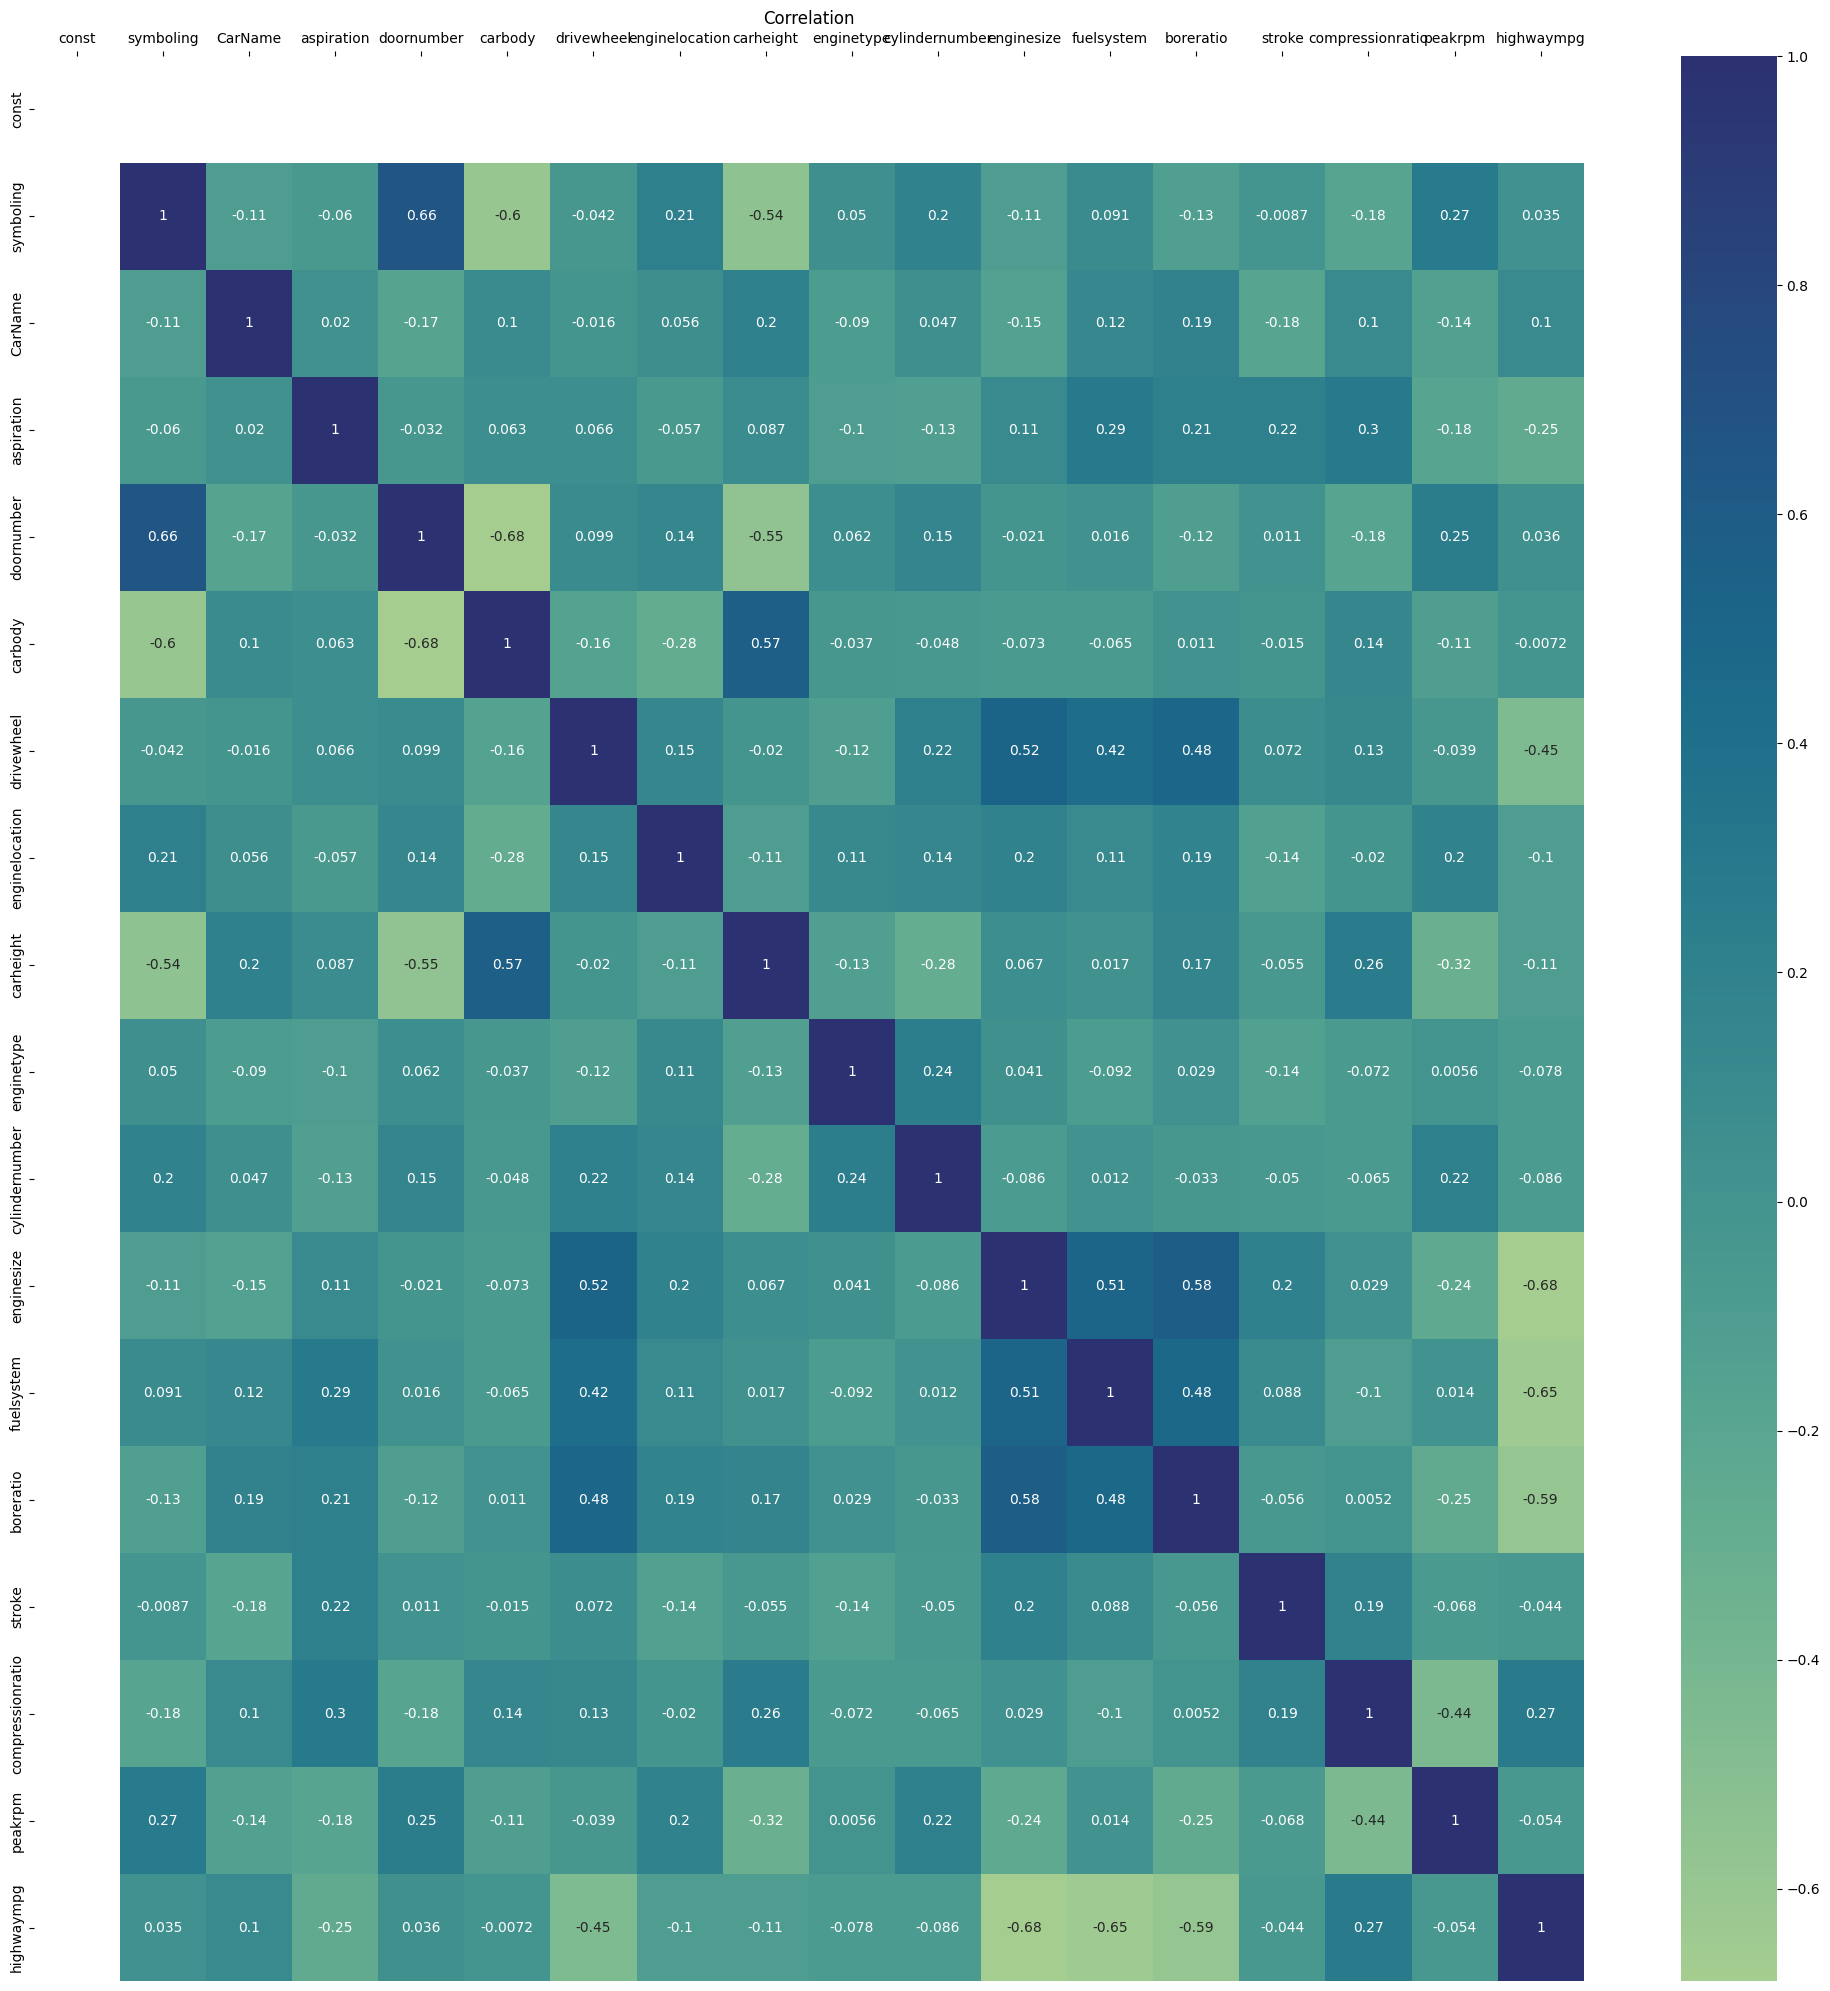

In [22]:
plt.figure(figsize = (25, 25), dpi = 100)
plt.title("Correlation")
ax = sns.heatmap(X_with_intercept.corr(), annot = True, cmap = "crest")
ax.xaxis.tick_top()
plt.show()

#Train_Test_Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y, test_size = 0.2, random_state = 42)

In [24]:
X_train.head()

,const,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,highwaympg
66,1.0,0,60,0,0,3,2,0,54.4,3,2,134,3,3.43,3.64,22.0,4200,39
111,1.0,0,85,0,0,3,2,0,56.7,2,2,120,5,3.46,2.19,8.4,5000,24
153,1.0,0,121,0,0,4,1,0,59.1,3,2,92,1,3.05,3.03,9.0,4800,37
96,1.0,1,76,0,0,3,1,0,54.5,3,2,97,1,3.15,3.29,9.4,5200,37
38,1.0,0,41,0,1,2,1,0,53.3,3,2,110,0,3.15,3.58,9.0,5800,33


#Fitting the model

In [25]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [26]:
m = lr.coef_
m

array([ 0.00000000e+00,  1.06871476e+02, -2.45731382e+01,  1.31111506e+03,
       -2.04156020e+03, -1.04354922e+03,  1.69442771e+03,  7.88528847e+03,
        3.59005005e+02,  3.10069185e+02, -2.73388165e+02,  1.29577537e+02,
        2.32811869e+02, -8.96740104e+01, -2.54736979e+03,  2.41339861e+02,
        2.47161788e+00, -1.67870729e+02])

In [27]:
C= lr.intercept_
C

-22173.102092158195

In [28]:
y_pred_train= lr.predict(X_train)
y_pred_train

array([14149.15212478, 17606.13331966,  5960.92269745,  7627.49881887,
        9722.74675632,  8138.55570929,  7897.44586089, 18544.03331421,
       15574.45716756,  6082.81723502, 17919.04607218,  6304.3499114 ,
        7981.5574877 ,  6052.93262637, 15349.69350615, 14312.22567232,
        8290.51741933, 35223.69948018,  5269.44359052,  9246.3895217 ,
       20773.25787773,  8756.11177859, 18316.51592975, 12048.69804716,
        6815.24779188, 17345.15486503,  9722.1829444 , 17213.77312519,
        7836.13258737,  5481.15969172, 14217.72899429,  6921.02815758,
        5931.41147421, 16562.58409939, 12045.88641416, 13060.52100511,
       16387.48499995,  5699.33636202,  8824.66308429,  7242.44531794,
       15133.44163649, 16881.17123199, 18939.63760996, 18657.09131421,
        5797.62891463, 13255.32356024,  6802.75890812, 34155.57712176,
        9723.81748822,  7727.93316828,  9943.66345105, 19586.03307164,
        9454.56087415,  6340.80847708, 13846.71702101,  9179.51654962,
      

#Checking the predictability of the model (goodness of fit)

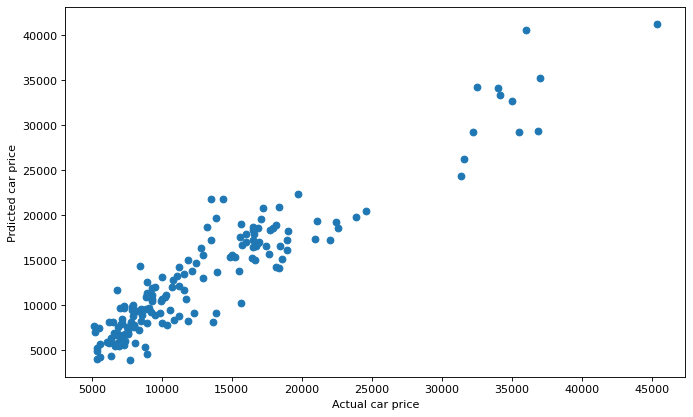

In [29]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual car price")
plt.ylabel("Prdicted car price")
plt.show()

In [30]:
#Checking the goodness of fit of the model

r2_score(y_train, y_pred_train)

0.8855507863782579

In [31]:
print(mean_absolute_error(y_train,  y_pred_train))
print(mean_squared_error(y_train, y_pred_train))
print(mean_absolute_percentage_error(y_train, y_pred_train))

1982.805407166867
6825503.590929645
0.1644086134790811


In [32]:
y_pred_test= lr.predict(X_test)
y_pred_test

array([28742.13711205, 14924.94990798, 10310.73069781, 12982.56405373,
       26119.71226263,  6247.82810894,  8734.7566922 ,  5912.97087664,
       10269.51234922,  5801.94560456, 14991.74922438,  6767.32377597,
       17345.80997663,  8878.97746935, 42115.27716405,  6458.46455234,
        -199.30239135, 15234.56306577,  9674.67121192, 11113.12716717,
       10967.33624934, 22468.77044965,  7496.54135782,  1358.20317697,
        7217.87217979, 25957.99376325, 14484.23763939, 16580.2051602 ,
        6175.79831713, 17025.6032596 , 26324.30419524,  6713.31369645,
        5204.14117968, 22998.60534126,  9463.56467626, 25976.02531766,
       10478.95418835,  8315.09055748,  6457.92083786, 15282.81260197,
        8206.32013149])

In [33]:
r2_score(y_test, y_pred_test)

0.8390342548568818

In [34]:
print(mean_absolute_error(y_test,  y_pred_test))
print(mean_squared_error(y_test, y_pred_test))
print(mean_absolute_percentage_error(y_test, y_pred_test))

2385.709225730201
12707283.145487985
0.20985660302205736


The MAPE is near 20% in the case of both test and train data. Therefore, the model is acceptable.

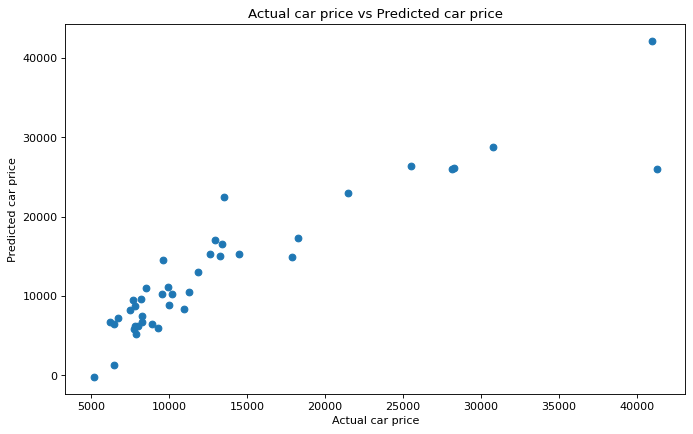

In [35]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.scatter(y_test, y_pred_test)
plt.title("Actual car price vs Predicted car price")
plt.xlabel("Actual car price")
plt.ylabel("Predicted car price")
plt.show()

#Checking the statistical significance of the coefficients of the independent variables.

In [36]:
lr_sm = sm.OLS(y_train, X_train).fit()
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     66.45
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           7.93e-60
Time:                        14:43:21   Log-Likelihood:                -1523.1
No. Observations:                 164   AIC:                             3082.
Df Residuals:                     146   BIC:                             3138.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.217e+04   1.18e+04  

In [37]:
X_with_intercept = X_with_intercept.drop(['fuelsystem', 'boreratio', 'cylindernumber', 'enginetype', 'aspiration', 'symboling'], axis=1)
X_with_intercept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             205 non-null    float64
 1   CarName           205 non-null    int16  
 2   doornumber        205 non-null    int8   
 3   carbody           205 non-null    int8   
 4   drivewheel        205 non-null    int8   
 5   enginelocation    205 non-null    int8   
 6   carheight         205 non-null    float64
 7   enginesize        205 non-null    int64  
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  peakrpm           205 non-null    int64  
 11  highwaympg        205 non-null    int64  
dtypes: float64(4), int16(1), int64(3), int8(4)
memory usage: 12.5 KB


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y, test_size = 0.2, random_state = 42)

Fitting the model again without the insignificant independent variables to see whether the predictability of car prices increases or not.

In [39]:
lr_sm1 = sm.OLS(y_train, X_train).fit()
print(lr_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     99.59
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.21e-63
Time:                        14:43:21   Log-Likelihood:                -1528.2
No. Observations:                 164   AIC:                             3080.
Df Residuals:                     152   BIC:                             3118.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.662e+04   9020.461  

In [40]:
lr1 = LinearRegression()

lr1.fit(X_train, y_train)

y_pred_train1= lr1.predict(X_train)
y_pred_train1

array([14360.26941016, 17755.38175927,  6030.39990715,  7697.51447836,
       10620.31700738,  8129.03789661,  8374.21286908, 18195.77721123,
       14811.19376319,  5733.34798701, 19234.08391869,  5727.01100802,
        7808.45178634,  6118.49433912, 15132.46326493, 14235.24007842,
        9468.10910547, 35256.41773803,  5114.4209553 , 10435.23441826,
       20376.52337524,  8872.33822007, 17162.67337297, 11924.72330171,
        7076.12739531, 17444.45222983, 10215.82184704, 17076.85802368,
        8654.8638801 ,  5781.74389223, 13878.80134993,  7570.87474207,
        6083.62011004, 16662.75515223, 12750.73276797, 12999.61544654,
       15042.95351259,  5834.5168355 ,  7307.8650887 ,  7170.87465703,
       14659.8609385 , 16814.14855044, 17850.61610667, 18233.50511759,
        5924.15908047, 12569.70771698,  6836.15215863, 34141.38056974,
       10291.05953499,  7625.6932971 , 10285.72748835, 19884.14054292,
       10199.88315209,  6500.54011164, 13626.62154414,  8579.71686509,
      

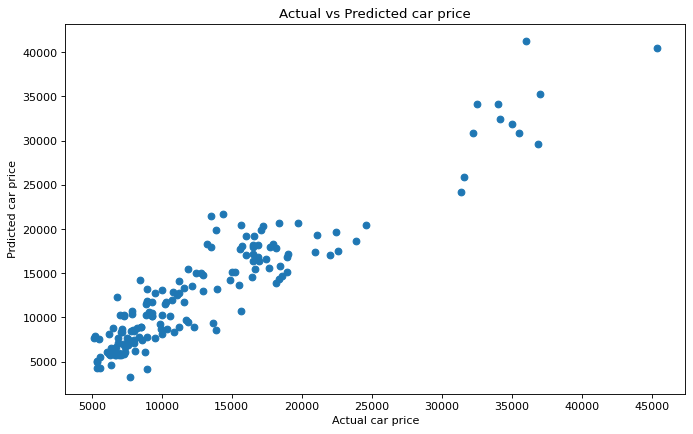

In [41]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.scatter(y_train, y_pred_train1)
plt.xlabel("Actual car price")
plt.ylabel("Prdicted car price")
plt.title("Actual vs Predicted car price")
plt.show()

We can't spot any improvement in the model. Therefore, the first model (lr) is considered final model for car price prediction.

#EDA

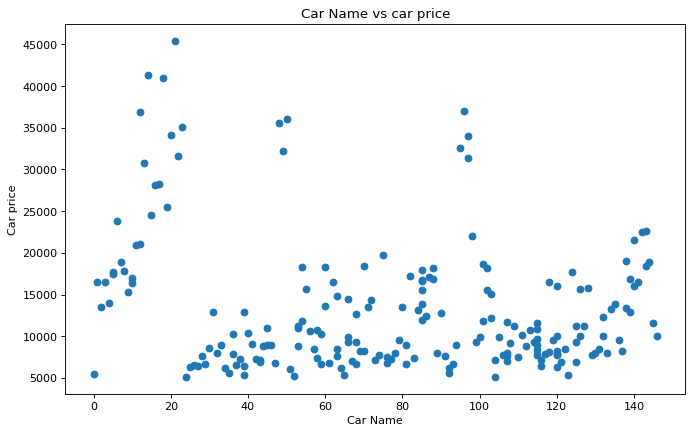

In [42]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.scatter(df['CarName'], df['price'])
plt.xlabel("Car Name")
plt.ylabel("Car price")
plt.title("Car Name vs car price")
plt.show()

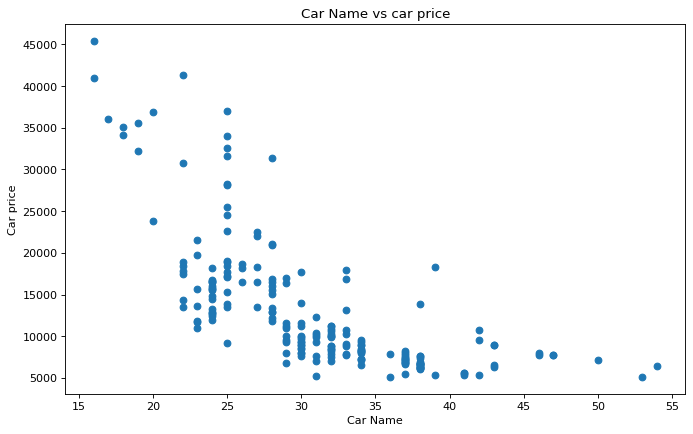

In [43]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.scatter(df['highwaympg'], df['price'])
plt.xlabel("Car Name")
plt.ylabel("Car price")
plt.title("Car Name vs car price")
plt.show()

In [44]:
Tkeys = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Lkeys = [135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145]

print("Cars with higher prices:", [cat_mapping_carname[key] for key in Tkeys])
print("Cars with lower prices:",[cat_mapping_carname[key] for key in Lkeys])

Cars with higher prices: ['alfa-romero Quadrifoglio', 'alfa-romero giulia', 'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i']
Cars with lower prices: ['volkswagen rabbit custom', 'volkswagen super beetle', 'volkswagen type 3', 'volvo 144ea', 'volvo 145e (sw)', 'volvo 244dl', 'volvo 245', 'volvo 246', 'volvo 264gl', 'volvo diesel', 'vw dasher']


In [45]:
cat_mapping_carbody

{0: 'convertible', 1: 'hardtop', 2: 'hatchback', 3: 'sedan', 4: 'wagon'}

In [46]:
cat_mapping_doornumber

{0: 'four', 1: 'two'}

In [47]:
cat_mapping_drivewheel

{0: '4wd', 1: 'fwd', 2: 'rwd'}

In [48]:
cat_mapping_enginelocation

{0: 'front', 1: 'rear'}